# Sales Prediction for BigMart

## Problem Description

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

This project is a regression problem i.e. we are predicting a continous value and will be solved via supervised learning because we already have past sales data.

## Hypothesis

These hypotheses were taken from [here](https://www.analyticsvidhya.com/blog/2016/02/bigmart-sales-solution-top-20/).

### Store Level Hypotheses:


1. City type: Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.
1. Population Density: Stores located in densely populated areas should have higher sales because of more demand.
1. Store Capacity: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place
1. Competitors: Stores having similar establishments nearby should have less sales because of more competition.
1. Marketing: Stores which have a good marketing division should have higher sales as it will be able to attract customers through the right offers and advertising.
1. Location: Stores located within popular marketplaces should have higher sales because of better access to customers.
1. Customer Behavior: Stores keeping the right set of products to meet the local needs of customers will have higher sales.
1. Ambiance: Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales.

### Product Level Hypotheses:

1. Brand: Branded products should have higher sales because of higher trust in the customer.
1. Packaging: Products with good packaging can attract customers and sell more.
1. Utility: Daily use products should have a higher tendency to sell as compared to the specific use products.
1. Display Area: Products which are given bigger shelves in the store are likely to catch attention first and sell more.
1. Visibility in Store: The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.
1. Advertising: Better advertising of products in the store will should higher sales in most cases.
1. Promotional Offers: Products accompanied with attractive offers and discounts will sell more.

## Exploring the dataset

| Variable                  | Description                                                                      |
|---------------------------|----------------------------------------------------------------------------------|
| Item_Identifier           | Unique Product ID                                                                |
| Item_Weight               | Weight of product                                                                |
| Item_Fat_Content          | Low in fat or not (Low Fat, Regular)                                             |
| Item_Visibility           | % of total display area allocated to the product                                 |
| Item_Type                 | Category for the product                                                         |
| Item_MRP                  | Maximum Retail price of the product                                              |
| Outlet_Identifier         | Unique Store ID                                                                  |
| Outlet_Establishment_Year | Year store was made                                                              |
| Outlet_Size               | Size of store (small, medium, high)                                              |
| Outlet_Location_Type      | Type of city (tier 1, tier 2, tier 3)                                            |
| Outlet_Type               | Supermarket or grocery                                                           |
| Item_Outlet_Sales         | Sale of product in the particular store. (Also what we are trying to predict!!!) |

## Getting Started

We use a virtual environment to do all our development in, this ensures that we don't import modules that accidentally conflict with other project work. 

1. `python3 -m venv venv` - this will create your virtual environment inside a `venv` folder
2. `source venv/bin/activate` - this will activate your virtual env
3. `python3 -m pip install -r requirements.txt`
4. If working on VSC you can press `cmd + shift + p` to bring up the command palette then type in `kernel` and select the `Notebook: select kernel` option then choose the virtual environment.

## Adding new modules

New modules should be added to the virtual env with the following command: `pip install <module-name>`
After the module has been added you should update the `requirements.txt` file using: `pip freeze > requirements.txt`

## Data analysis

In [87]:
import pandas as pd

train = pd.read_csv('data/train_kOBLwZA.csv')
test = pd.read_csv('data/train_kOBLwZA.csv')

print(train.shape, test.shape)

(8523, 12) (8523, 12)


In [88]:
df = pd.concat([train, test], ignore_index=True)
print(df.dtypes)
print(df.head)

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object
<bound method NDFrame.head of       Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0               FDA15        9.300          Low Fat         0.016047   
1               DRC01        5.920          Regular         0.019278   
2               FDN15       17.500          Low Fat         0.016760   
3               FDX07       19.200          Regular         0.000000   
4               NCD19        8.930          Low Fat         0.000000   
...               ...          ...              ...              ...   
17041   

In [89]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14120.000000,17046.000000,17046.000000,17046.000000,17046.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643292,0.051596,62.273240,8.371515,1706.449556
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026988,93.817950,1987.000000,833.914500
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094594,185.652250,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


From the above table we can that there is quite a disparrity between the minimum sale and the max sale. The standard deviation is also quite large which tells us that the data points are spread out over a wide range of values indicating a possible outlier. Lets plot it out to see if our theory is correct. 

Another thing I noticed is that the item visibility is 0. This doesn't make much sense as how can a person know to buy the item if they don't know its on sale?

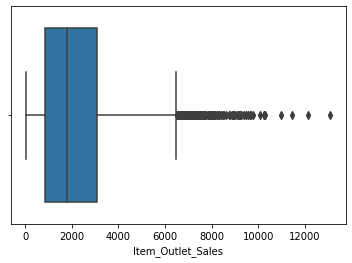

In [90]:
import seaborn as sns

ax = sns.boxplot(x=df["Item_Outlet_Sales"])

![box plot](assets/boxplot.png)

Boxplots are a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).

- median (Q2/50th Percentile): the middle value of the dataset.
- first quartile (Q1/25th Percentile): the middle number between the smallest number (not the “minimum”) and the median of the dataset.
- third quartile (Q3/75th Percentile): the middle value between the median and the highest value (not the “maximum”) of the dataset.
- interquartile range (IQR): 25th to the 75th percentile.
- whiskers (shown in blue)
- outliers (shown as green circles)
- “maximum”: Q3 + 1.5*IQR
- “minimum”: Q1 -1.5*IQR

Now after re-capping on some basic high school lessons about boxplot we can understand that our sales data contains a considerable number of outliers. Also our data seems to be skewed more towards the lower end with the median being around 2000.


In [91]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

print(IQR, Q1, Q3)

max_outliers = Q3 + 1.5 * IQR
print('\nmax outliers:\n', max_outliers)

Item_Weight                     8.076250
Item_Visibility                 0.067606
Item_MRP                       91.834300
Outlet_Establishment_Year      17.000000
Item_Outlet_Sales            2267.381900
dtype: float64 Item_Weight                     8.773750
Item_Visibility                 0.026988
Item_MRP                       93.817950
Outlet_Establishment_Year    1987.000000
Item_Outlet_Sales             833.914500
Name: 0.25, dtype: float64 Item_Weight                    16.850000
Item_Visibility                 0.094594
Item_MRP                      185.652250
Outlet_Establishment_Year    2004.000000
Item_Outlet_Sales            3101.296400
Name: 0.75, dtype: float64

max outliers:
 Item_Weight                    28.964375
Item_Visibility                 0.196004
Item_MRP                      323.403700
Outlet_Establishment_Year    2029.500000
Item_Outlet_Sales            6502.369250
dtype: float64


We plot the maximum outliers and now we know the specific value of the sales outliers but also the rest of the dataframe. Lets work out if we can find the number of outliers in each column.

In [92]:
import numpy as np

def replaceOutliersWithNaN(values, outlier):
    return [value if value < outlier else np.nan for value in values ]
    
df1 = df.apply(lambda col: replaceOutliersWithNaN(col, max_outliers[col.name]) if col.name in max_outliers.keys() else col, axis=0)
beforeNaN = df.isna().sum().sum()
afterNaN = df1.isna().sum().sum()
outlier_count = afterNaN - beforeNaN
df1['Item_Outlet_Sales'].isna().sum()
df = df1


We have replaced outliers in the dataframe with NaN but what should we do with them? We have several options: 
- Do nothing, some algorithms might throw errors
- We drop the outliers but this reduces our dataset and potentially our predictive power.
- We replace the NaNs with the mean or median value for that column. If we replace them with the mean then one interesting thing is that the mean value doesn't change!
- Replace with most frequent values (works well with string columns) but may introduce bias into the dataset.
- Replace with constant values e.g. 0
- Use K-NN to find feature similarity (computationally expensive)
- Imputation using MICE or deep learning (datawig)

For now we will proceed with outliers but it's something we can try changing in the future.

## Plotting graphs for further analysis



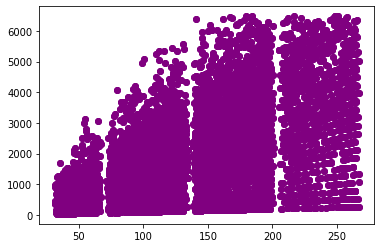

In [93]:
import matplotlib.pyplot as plt

plt.scatter(df1.Item_MRP, df1.Item_Outlet_Sales, c="purple")
plt.show()

# We can see that as the maximum retail price of the product increases so does the amount of revenue for that product in that store.

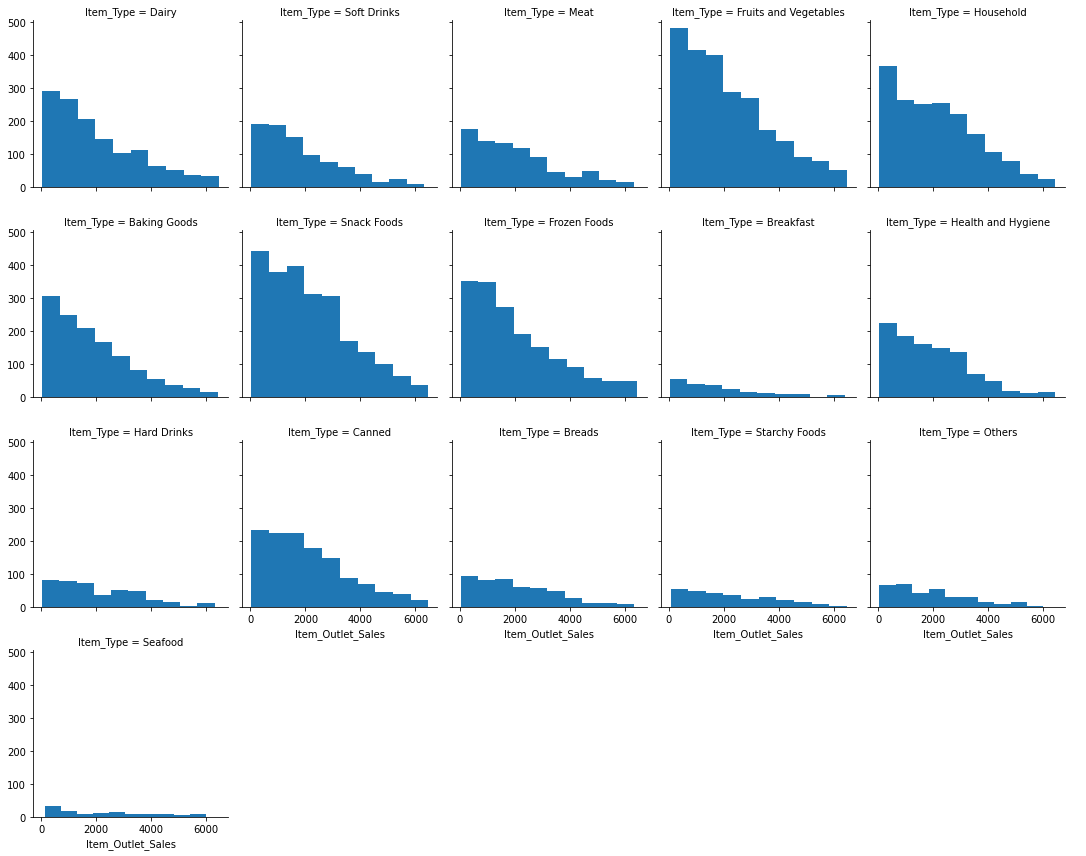

In [94]:
# Prefer grid graphs for categorical data

sns.FacetGrid(df1, col="Item_Type", height=3, col_wrap=5).map(plt.hist, 'Item_Outlet_Sales').add_legend()

From the above Facet Grid out of all the different types of items the shops sell, the ones generating the most profit is Snack foods and Fruit and Vegetables. Overall food scores quite well in comparison to drinks.

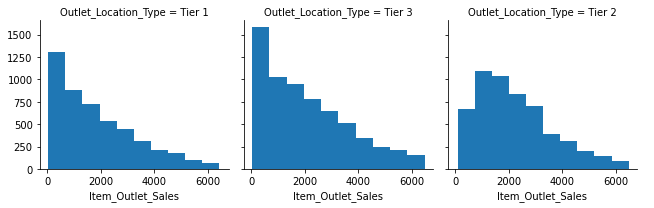

In [95]:
sns.FacetGrid(df, col="Outlet_Location_Type", height=3, col_wrap=3).map(plt.hist, "Item_Outlet_Sales").add_legend()

This one is a bit harder to compare but looks like there are higher sales from a Tier 3 shop compared to the other tiers. But there is also a larger amount of shops in Tier 3 which are not generating much/if any profit.

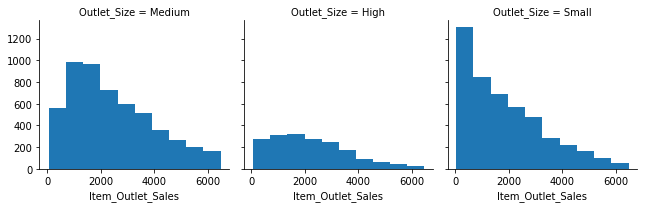

In [96]:
sns.FacetGrid(df, col="Outlet_Size", height=3, col_wrap=3).map(plt.hist, "Item_Outlet_Sales").add_legend()

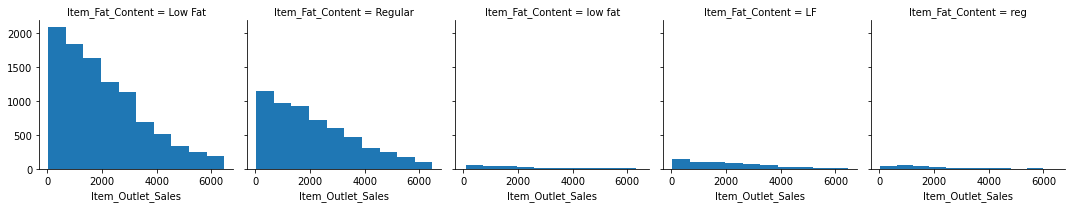

In [97]:
sns.FacetGrid(df, col="Item_Fat_Content", height=3, col_wrap=5).map(plt.hist, "Item_Outlet_Sales").add_legend()

This result is rather interesting because we have discovered an issue with the data set! As you can see "low fat", "Low Fat" and "LF" are all the same thing! Same with "Regular" and "reg".

Overall Low fat products seem to be selling more - people being more health conscious


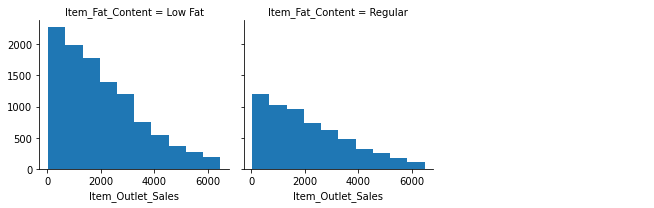

In [98]:
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace(["low fat", "LF", "reg"], ["Low Fat", "Low Fat", "Regular"])
sns.FacetGrid(df, col="Item_Fat_Content", height=3, col_wrap=3).map(plt.hist, "Item_Outlet_Sales").add_legend()

# Fixing the fat content data issue

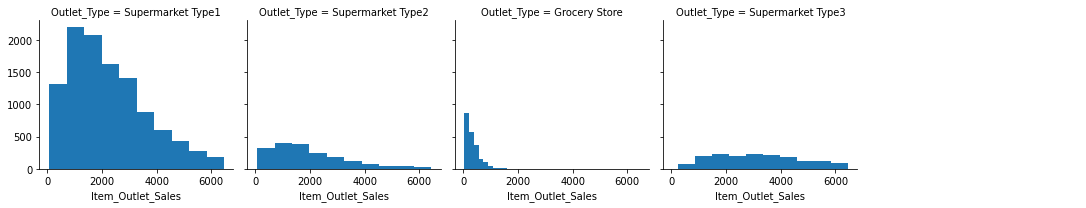

In [99]:
sns.FacetGrid(df, col="Outlet_Type", height=3, col_wrap=5).map(plt.hist, "Item_Outlet_Sales").add_legend()

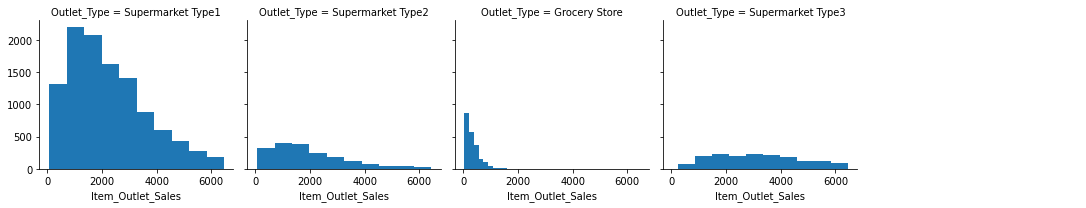

In [100]:
sns.FacetGrid(df1, col="Outlet_Type", height=3, col_wrap=5).map(plt.hist, "Item_Outlet_Sales").add_legend()

Supermarket sales far outweigh grocery stores, maybe because there is more variety of products to choose from?

In [101]:
#Filter categorical variables
categorical_columns = [x for x in df.dtypes.index if df.dtypes[x]=='object']
#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier','source']]
#Print frequency of categories
for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print (df[col].value_counts())


Frequency of Categories for varible Item_Fat_Content
Low Fat    11034
Regular     6012
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible Item_Type
Fruits and Vegetables    2464
Snack Foods              2400
Household                1820
Frozen Foods             1712
Dairy                    1364
Canned                   1298
Baking Goods             1296
Health and Hygiene       1040
Soft Drinks               890
Meat                      850
Breads                    502
Hard Drinks               428
Others                    338
Starchy Foods             296
Breakfast                 220
Seafood                   128
Name: Item_Type, dtype: int64

Frequency of Categories for varible Outlet_Size
Medium    5586
Small     4776
High      1864
Name: Outlet_Size, dtype: int64

Frequency of Categories for varible Outlet_Location_Type
Tier 3    6700
Tier 2    5570
Tier 1    4776
Name: Outlet_Location_Type, dtype: int64

Frequency of Categories for varible Outlet_Type

When looking at item identifiers we can see they all start with FD, DR or NC. Comparing the item identifier to the item type and we can deduce that: 
- FD = Food
- DR = Drink
- NC = Non-consumable.

We should create an additional feature that encompasses this information.

In [102]:
df['Item_Type_combined']=df['Item_Identifier'].apply(lambda x : x[0:2]).copy()
df['Item_Type_combined'].replace(to_replace =['FD','DR','NC'], 
                 value =['Food','Drinks','Non_consumable'],inplace=True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_combined
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non_consumable


In [103]:
# This then made me think back to the low fat contents and surely an item labelled as non-consumerable should not have a fat content right?

# gets each row as true/false
rows_of_non_consumerable = df["Item_Type_combined"] == "Non_consumable"

# replace the truthy with "N/A" rather than "No Fat" to avoid confusion in future with zero fat products
df["Item_Fat_Content"][rows_of_non_consumerable] = "N/A"
df["Item_Fat_Content"].value_counts()



0    False
1    False
2    False
3    False
4     True
Name: Item_Type_combined, dtype: bool


/var/folders/n5/ffqtk_k17s3gt9ypzktqdpbc0000gn/T/ipykernel_3992/3419232437.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Item_Fat_Content"][rows_of_non_consumerable] = "N/A"


Low Fat    7836
Regular    6012
N/A        3198
Name: Item_Fat_Content, dtype: int64

In [104]:
# Our model can't understand the categorial data e.g. Canned, Dairy, Seafood. Instead we need to map them into numerical values
# Canned => 0, Dairy => 1,...

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df = df.apply(lambda col: label_encoder.fit_transform(col) if col.name in categorical_columns else col )
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_combined
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380,Food
1,DRC01,5.92,2,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228,Drinks
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700,Food
3,FDX07,19.20,2,0.000000,6,182.0950,OUT010,1998,3,2,0,732.3800,Food
4,NCD19,8.93,1,0.000000,9,53.8614,OUT013,1987,0,2,1,994.7052,Non_consumable
